<a href="https://colab.research.google.com/github/tracieschroeder/Participant-Notebooks/blob/main/General%20and%20Misc/In%20Progress/SEC_2018_Football_Passing_Stats.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

The dataset contains SEC passing data from the 2018 season. In this activity you will manipulate the data to gain insights into offensive success.

### Data Loading

The data for this activity is stored in a Google Sheet. We can use the `pandas` library to read this data directly into a DataFrame. The `pd.read_csv()` function is used here, and we provide the URL of the Google Sheet with the `export?format=csv` parameter to get the data in a CSV format.

The data is then stored in a pandas DataFrame called `df`, which we will use for our analysis.

In [ ]:
# imports some software packages we'll use. Nothing here needs to be changed. Hit the play button!
import pandas as pd # Pandas works with python to help us wrangle data. It can sort, clean, and read our csv files. csv files are how we input data
import numpy as np # Numpy handles the math!
import matplotlib as mpl
import matplotlib.pyplot as plt # Both of these help us make pretty graphs

In [ ]:
#Running this cell is the first step in getting data from a Goolge Sheet
#When you run this you will have to agree to some Google permissions
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### Data Exploration

Before diving into analysis, it's always a good idea to explore your data. This helps you understand its structure, content, and identify any potential issues.

The `df.head()` command is a very useful tool for this. It displays the first few rows of your DataFrame, giving you a quick peek at what your data looks like. By default, it shows the first 5 rows, but you can specify a different number inside the parentheses, like `df.head(10)` to see the first 10 rows.

In [ ]:
#Read in the SEC 2018 passing data. This cell has no output.
# Create a variable called df (short for dataframe) and store the data in it
df = pd.read_csv('https://docs.google.com/spreadsheets/d/1saJybjaxZkY16WV-y-Pq3FFkxdOSn0vadxdLlaHv_g4/export?format=csv')
df.head()



,Player,Team,Att,Cmp,Pct,Yds,YPA,TD,TD%,Int,Int%,Lg,Sack,Loss,Rate,Stat Type
0,Tua Tagovailoa,ALA,355,245,69.0,"3,966",11.2,43,12.1,6,1.7,81t,13,110,199.4,Passing
1,Jordan Ta'amu,MISS,418,266,63.6,"3,918",9.4,19,4.5,8,1.9,84t,28,176,153.5,Passing
2,Drew Lock,MIZZ,437,275,62.9,"3,498",8.0,28,6.4,8,1.8,86t,13,98,147.7,Passing
3,Jake Bentley,SCAR,389,240,61.7,"3,171",8.2,27,6.9,14,3.6,89,21,133,145.9,Passing
4,Kyle Shurmur,VAN,406,254,62.6,"3,130",7.7,24,5.9,6,1.5,75t,21,161,143.9,Passing
5,Kellen Mond,TAMU,415,238,57.3,"3,107",7.5,24,5.8,9,2.2,69,34,217,135.0,Passing
6,Joe Burrow,LSU,379,219,57.8,"2,894",7.6,16,4.2,5,1.3,71t,35,190,133.2,Passing
7,Jarrett Stidham,AUB,369,224,60.7,"2,794",7.6,18,4.9,5,1.4,76t,23,168,137.7,Passing
8,Jake Fromm,UGA,307,207,67.4,"2,761",9.0,30,9.8,6,2.0,75t,16,94,171.3,Passing
9,Feleipe Franks,FLA,322,188,58.4,"2,457",7.6,24,7.5,6,1.9,65t,15,97,143.3,Passing


### Activity: Cleaning the 'Yds' column

The 'Yds' column is currently stored as an object type because of the commas. To perform numerical analysis, you need to convert it to a numeric type. Your task is to:

1. Remove the commas from the 'Yds' column.
2. Convert the 'Yds' column to a numeric data type (e.g., integer or float).

Here's the code to do that:

In [ ]:
# Remove commas from the 'Yds' column and convert it to numeric
df['Yds'] = df['Yds'].astype(str).str.replace(',', '', regex=False).astype(int)

# Display the data types to confirm the change
print(df.dtypes)

# Display the first few rows to see the cleaned data
display(df.head())

Player        object
Team          object
Att            int64
Cmp            int64
Pct          float64
Yds            int64
YPA          float64
TD             int64
TD%          float64
Int            int64
Int%         float64
Lg            object
Sack           int64
Loss           int64
Rate         float64
Stat Type     object
dtype: object


,Player,Team,Att,Cmp,Pct,Yds,YPA,TD,TD%,Int,Int%,Lg,Sack,Loss,Rate,Stat Type
0,Tua Tagovailoa,ALA,355,245,69.0,3966,11.2,43,12.1,6,1.7,81t,13,110,199.4,Passing
1,Jordan Ta'amu,MISS,418,266,63.6,3918,9.4,19,4.5,8,1.9,84t,28,176,153.5,Passing
2,Drew Lock,MIZZ,437,275,62.9,3498,8.0,28,6.4,8,1.8,86t,13,98,147.7,Passing
3,Jake Bentley,SCAR,389,240,61.7,3171,8.2,27,6.9,14,3.6,89,21,133,145.9,Passing
4,Kyle Shurmur,VAN,406,254,62.6,3130,7.7,24,5.9,6,1.5,75t,21,161,143.9,Passing


### Activity: Basic Data Analysis - Average YPA

Now that the data is loaded and cleaned, let's perform some basic analysis. Calculate the average Yards Per Attempt (YPA) for all players in the dataset.

*Hint: You can access the 'YPA' column and use the `.mean()` method.*

In [ ]:
# Calculate the average YPA
average_ypa = df['YPA'].mean()

# Display the average YPA
print(f"The average Yards Per Attempt (YPA) is: {average_ypa:.2f}")

The average Yards Per Attempt (YPA) is: 8.21


### Activity: Basic Data Analysis - Player with the Most Touchdowns

Let's find out which player had the most passing touchdowns.

*Hint: You can sort the DataFrame by the 'TD' column in descending order and look at the top row.*

In [ ]:
# Find the player with the most touchdowns
player_most_td = df.sort_values(by='TD', ascending=False).iloc[0]

# Display the player with the most touchdowns
print("Player with the most touchdowns:")
display(player_most_td)

Player with the most touchdowns:


,0
Player,Tua Tagovailoa
Team,ALA
Att,355
Cmp,245
Pct,69.0
Yds,3966
YPA,11.2
TD,43
TD%,12.1
Int,6


### Activity: Data Visualization - Touchdowns per Team

Visualizing data can help us understand patterns and trends. Let's create a bar chart to see the total number of touchdowns thrown by players on each team.

*Hint: You'll need to group the data by 'Team' and sum the 'TD' column before plotting. Use `matplotlib.pyplot` to create the bar chart.*

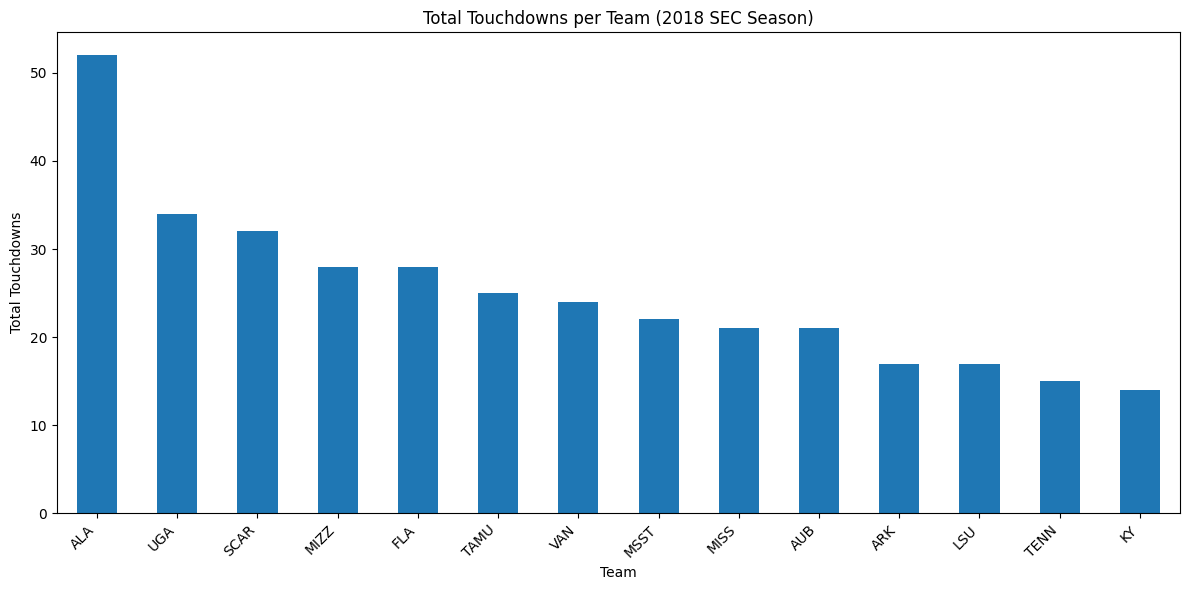

In [ ]:
# Calculate the total touchdowns per team
touchdowns_per_team = df.groupby('Team')['TD'].sum().sort_values(ascending=False)

# Create a bar chart
plt.figure(figsize=(12, 6))
touchdowns_per_team.plot(kind='bar')
plt.title('Total Touchdowns per Team (2018 SEC Season)')
plt.xlabel('Team')
plt.ylabel('Total Touchdowns')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

### Activity: Data Visualization - Passing Metrics Ratio

Let's create a visualization to compare the ratio of passing attempts (Att), completions (Cmp), and total yards (Yds) for each player. This can help us understand the efficiency of each player.

*Hint: You can select the relevant columns and create a bar chart. You might need to normalize the data or consider a different chart type for better comparison.*

<Figure size 1500x800 with 0 Axes>

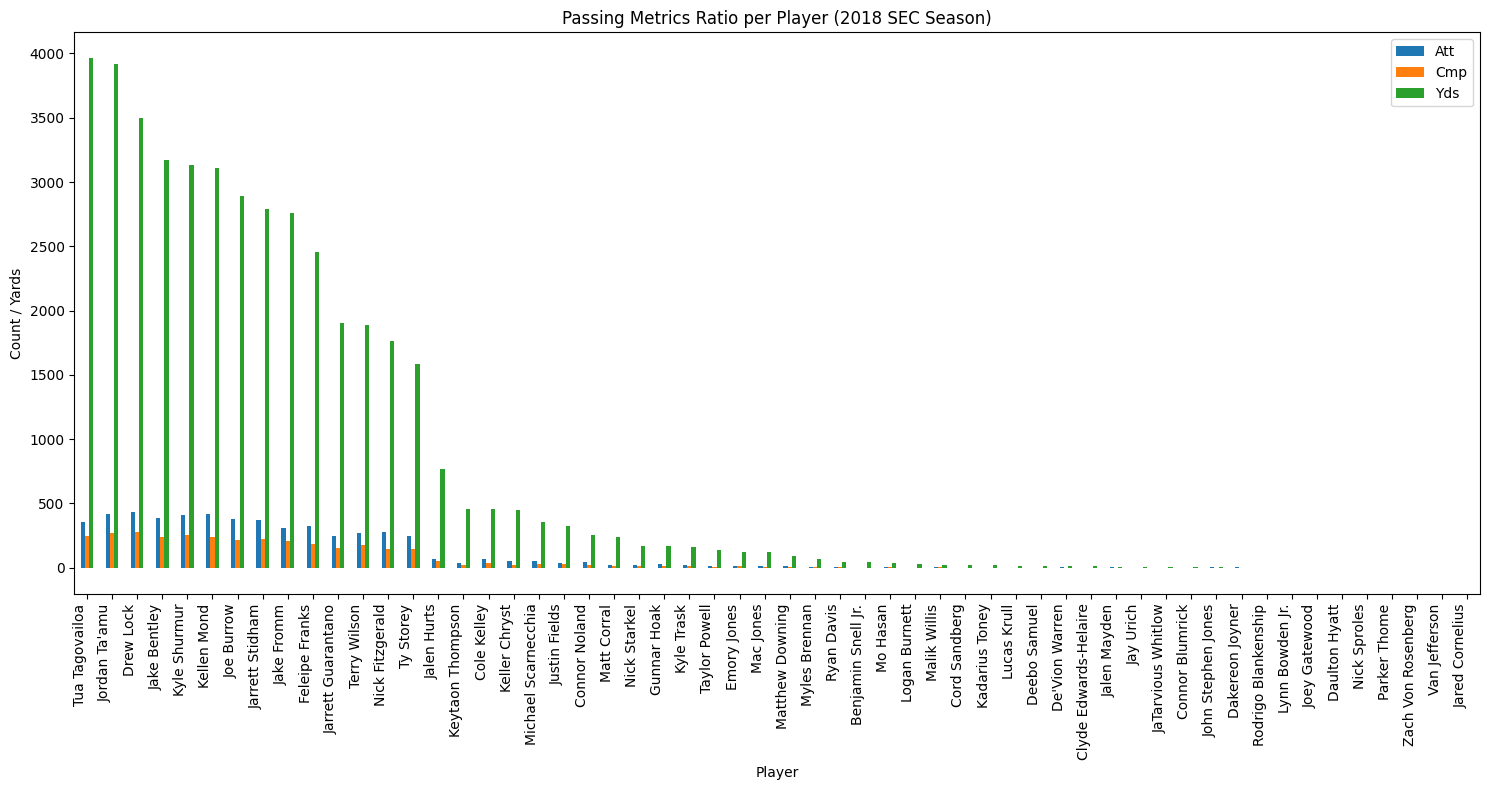

In [ ]:
# Select relevant columns for visualization
passing_metrics = df[['Player', 'Att', 'Cmp', 'Yds']]

# Set 'Player' as the index for easier plotting
passing_metrics = passing_metrics.set_index('Player')

# Create a grouped bar chart
plt.figure(figsize=(15, 8))
passing_metrics.plot(kind='bar', figsize=(15, 8))
plt.title('Passing Metrics Ratio per Player (2018 SEC Season)')
plt.xlabel('Player')
plt.ylabel('Count / Yards')
plt.xticks(rotation=90, ha='right')
plt.tight_layout()
plt.show()

### Activity: Data Visualization - Touchdown to Interception Ratio

Let's visualize the ratio of touchdowns (TD) to interceptions (Int) for each player. A higher ratio generally indicates better performance.

*Hint: You can calculate the ratio for each player and then create a bar chart to display it.*

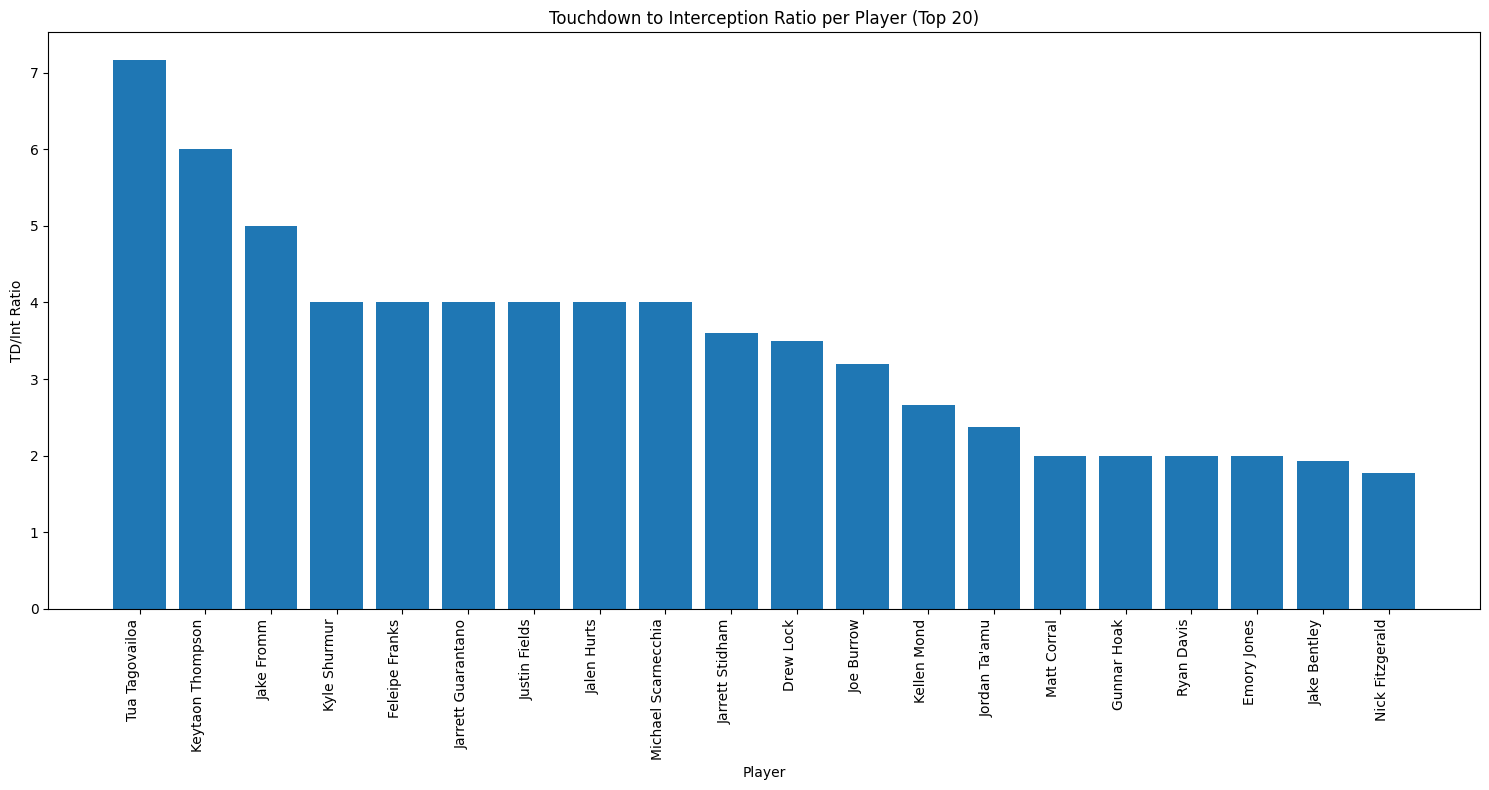

In [ ]:
# Calculate the TD to Int ratio, handling cases where Int is zero to avoid division errors
df['TD_Int_Ratio'] = df.apply(lambda row: row['TD'] / row['Int'] if row['Int'] != 0 else row['TD'], axis=1)

# Sort by the ratio to see the highest ratios
td_int_ratio_sorted = df.sort_values(by='TD_Int_Ratio', ascending=False)

# Select the top players for visualization (optional, to keep the chart readable)
top_players_ratio = td_int_ratio_sorted.head(20) # Display top 20 players

# Create a bar chart of the TD to Int ratio
plt.figure(figsize=(15, 8))
plt.bar(top_players_ratio['Player'], top_players_ratio['TD_Int_Ratio'])
plt.title('Touchdown to Interception Ratio per Player (Top 20)')
plt.xlabel('Player')
plt.ylabel('TD/Int Ratio')
plt.xticks(rotation=90, ha='right')
plt.tight_layout()
plt.show()

### Conclusion and Further Exploration

Congratulations! You have successfully loaded, cleaned, and performed some basic analysis and visualizations on the SEC 2018 passing data.

You learned how to:

- Load data from a CSV file into a pandas DataFrame.
- Clean data by removing characters and converting data types.
- Perform basic data analysis using pandas functions like `.mean()` and `.sort_values()`.
- Create visualizations using `matplotlib` to understand trends in the data.

Here are some ideas for further analysis you could explore:

- Calculate the completion percentage for each player.
- Analyze the relationship between different metrics, such as YPA and TD%.
- Create different types of visualizations, such as scatter plots or histograms, to explore other aspects of the data.
- Compare the performance of players from different teams in more detail.
- Research and add more relevant data to the analysis.